## The Programming Historian 
# Introduction to stylometry with Python

#### This jupyter notebook is based on François Dominic Laramée, "Introduction to stylometry with Python," The Programming Historian 7 (2018), https://doi.org/10.46430/phen0078.

In [91]:
import os
import nltk
import math
%matplotlib inline

## Prepare files

In [24]:
# make same the Vasari files
list_of_files = os.listdir('./data/results/Dante')
#list_of_files

In [26]:
# extract the letter numbers for every author

Vasari = list()
Bartoli = list()
Borghini = list()
Vcopy = list()
Giambullari = list()
unkown = list()


for i in list_of_files:
    if i.startswith('Bartoli'):
        x = str(i)
        Bartoli.append((x.split('_')[1]).strip('.txt'))
    
    if i.startswith('Borghini'):
        x = str(i)
        Borghini.append((x.split('_')[1]).strip('.txt'))
        
    if i.startswith('Giambullari'):
        x = str(i)
        Giambullari.append((x.split('_')[1]).strip('.txt'))
        
    if i.startswith('Vasari'):
        x = str(i)
        Vasari.append((x.split('_')[1]).strip('.txt'))
        
    if i.startswith('Vcopy'):
        x = str(i)
        Vcopy.append((x.split('_')[1]).strip('.txt'))
        
    if i.startswith('unkown'):
        x = str(i)
        unkown.append((x.split('_')[1]).strip('.txt'))
        
        
#unkown

In [28]:
# build the same dictionary

Vpapers = {
    'Bartoli': Bartoli, 
    'Borghini': Borghini, 
    'Giambullari': Giambullari,
    'Vasari': Vasari, 
    'Vcopy': Vcopy,
    'unkown': unkown
}

#Vpapers

In [37]:
# build lists of filenames

Vasari = list()
Bartoli = list()
Borghini = list()
Vcopy = list()
Giambullari = list()
unkown = list()


for i in list_of_files:
    if i.startswith('Bartoli'):
        Bartoli.append(i)
    
    if i.startswith('Borghini'):
        Borghini.append(i)
        
    if i.startswith('Giambullari'):
        Giambullari.append(i)
        
    if i.startswith('Vasari'):
        Vasari.append(i)
        
    if i.startswith('Vcopy'):
        Vcopy.append(i)
        
    if i.startswith('unkown'):
        unkown.append(i)
len(Giambullari)

6

### function to read Vasari files

In [59]:
# A function that compiles all of the text files associated with a single author 
# into a single string

def read_files_into_stringV(filenames):
    strings = []
    for filename in filenames:
        with open('data/results/Dante/' + filename) as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [73]:
# Make a dictionary out of the authors' corpora
authorsV = list(Vpapers.keys())
files_by_author = {}

for author in authorsV:
    files_by_author[author] = read_files_into_stringV(eval(author))

In [75]:
for author in authorsV:
    print(files_by_author[author][:100])

Molto Magnifico Signor Cavaliere. Tanto quanto io mi rallegro, che voi con l’aver finita la gran sal
Magnifico messer Giorgio. Come io son giunto in villa, la prima cosa io ho pensato un poco allo scri
Messer Giorgio mio caro. De’ tanti disagi e fastidii, che per me avete patiti, una sola satisfazzion
Molto Magnifico Messer Giovanni, Signor mio. Essi riceuto le 101 lastre ben condizionate, ecetto che
Illustrissimo e Eccellentissimo Signor mio. Io mi son tanto rallegrato della riforma, fatta a l’oper
Pesello e Francesco Peselli
Rare volte suole avvenire che i discepoli de’ maestri rari, se osservano


# First Stylometric Test: Mendenhall’s Characteristic Curves of Composition

## Vasari version

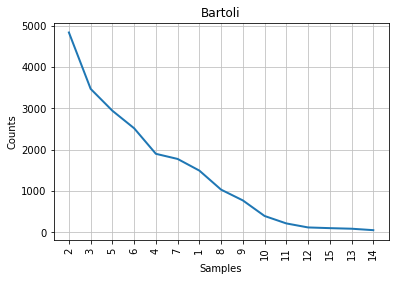

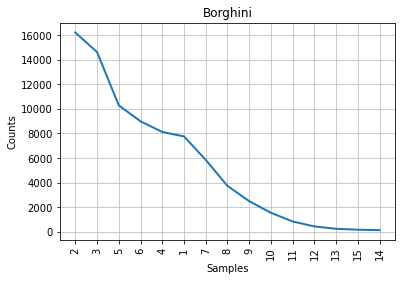

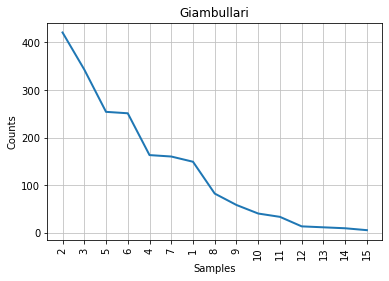

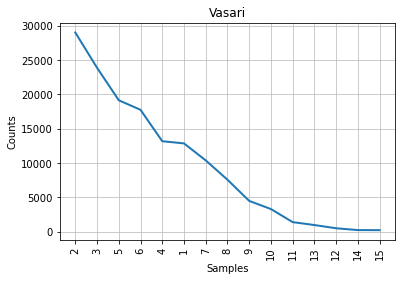

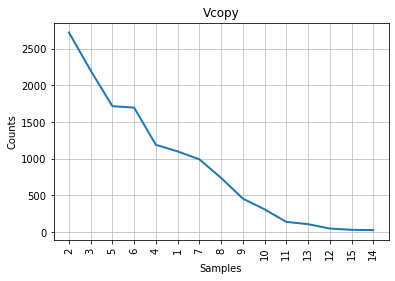

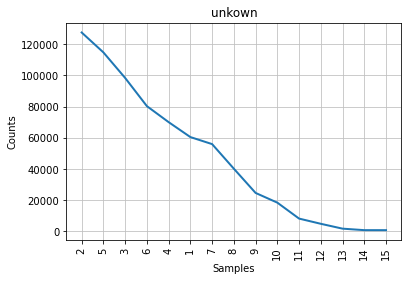

In [82]:
# Compare the disputed papers to those written by everyone,
# including the shared ones.

# Transform the authors' corpora into lists of word tokens
lives_by_author_tokens = {}
lives_by_author_length_distributions = {}
for author in authorsV:
    tokens = nltk.word_tokenize(files_by_author[author], language = 'italian')

    # Filter out punctuation
    lives_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])

    # Get a distribution of token lengths
    token_lengths = [len(token) for token in lives_by_author_tokens[author]]
    lives_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    lives_by_author_length_distributions[author].plot(15,title=author)

# Second Stylometric Test: Kilgariff’s Chi-Squared Method

## Vasari version

In [84]:
authorsV

['Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy', 'unkown']

In [87]:
# Who are the authors we are analyzing?
authors = ("Vasari", "Borghini", "Giambullari", "Vcopy", "Bartoli")

# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    lives_by_author_tokens[author] = (
        [token.lower() for token in lives_by_author_tokens[author]])
lives_by_author_tokens["unkown"] = (
    [token.lower() for token in lives_by_author_tokens["unkown"]])

# Calculate chisquared for each of the two candidate authors
for author in authors:

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (lives_by_author_tokens[author] +
                    lives_by_author_tokens["unkown"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(700))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(lives_by_author_tokens[author])
                    / len(joint_corpus))

    # Now, let's look at the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = lives_by_author_tokens[author].count(word)
        disputed_count = lives_by_author_tokens["unkown"].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count) /
                       expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author, "is", round(chisquared,3))

The Chi-squared statistic for candidate Vasari is 84265.326
The Chi-squared statistic for candidate Borghini is 64834.969
The Chi-squared statistic for candidate Giambullari is 3037.064
The Chi-squared statistic for candidate Vcopy is 23354.609
The Chi-squared statistic for candidate Bartoli is 29068.342


## The Chi-squared results different in number of common words
### joint_freq_dist = nltk.FreqDist(joint_corpus)
    

## most_common = list(joint_freq_dist.most_common(700)

- The Chi-squared statistic for candidate Vasari is 84265.326
- The Chi-squared statistic for candidate Borghini is 64834.969
- The Chi-squared statistic for candidate Giambullari is 3037.064
- The Chi-squared statistic for candidate Vcopy is 23354.609
- The Chi-squared statistic for candidate Bartoli is 29068.342



## most_common = list(joint_freq_dist.most_common(500)

- The Chi-squared statistic for candidate Vasari is 74044.9
- The Chi-squared statistic for candidate Borghini is 54457.2
- The Chi-squared statistic for candidate Giambullari is 2450.3
- The Chi-squared statistic for candidate Vcopy is 19427.1
- The Chi-squared statistic for candidate Bartoli is 23755.9

## most_common = list(joint_freq_dist.most_common(300)

- The Chi-squared statistic for candidate Vasari is 61539.958
- The Chi-squared statistic for candidate Borghini is 43269.587
- The Chi-squared statistic for candidate Giambullari is 1839.374
- The Chi-squared statistic for candidate Vcopy is 7896.447
- The Chi-squared statistic for candidate Bartoli is 12885.447

# Third Stylometric Test: John Burrows’ Delta Method

# Vasari version

In [96]:
authorsV

['Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy', 'unkown']

In [185]:
# Feature Selection


# Who are we dealing with this time?
authors = ('Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy')

# Convert papers to lowercase to count all tokens of the same word together
# regardless of case
for author in authors:
    lives_by_author_tokens[author] = (
        [tok.lower() for tok in lives_by_author_tokens[author]])

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += lives_by_author_tokens[author]

# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(X)) # ! # X VARIABLE <--------- !
whole_corpus_freq_dist[ :10 ]

[('che', 12468),
 ('e', 9651),
 ('di', 8122),
 ('a', 5428),
 ('non', 4553),
 ('et', 4087),
 ('la', 4058),
 ('per', 3770),
 ('il', 3570),
 ('in', 3050)]

In [186]:
# Calculating features for each subcorpus

# The main data structure
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {}

    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(lives_by_author_tokens[author])

    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = lives_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall


In [187]:
# Calculating feature averages and standard deviations

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean
    # and standard deviation
    corpus_features[feature] = {}

    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

In [188]:
# Calculating z-scores

feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:

        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)


In [189]:
# Calculating features and z-scores for our test case

# Tokenize the test case
testcase_tokens = nltk.word_tokenize(files_by_author["unkown"], language = 'italian')

# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature che is -5.281407843070917
Test case z-score for feature e is 0.3311885573290748
Test case z-score for feature di is 1.491891904435234
Test case z-score for feature a is -1.717053114812605
Test case z-score for feature non is -1.3023892080578598
Test case z-score for feature et is -0.5767917862105967
Test case z-score for feature la is -0.5405370961942899
Test case z-score for feature per is -0.9089882034797925
Test case z-score for feature il is 0.7566063913064
Test case z-score for feature in is 4.371861439948174
Test case z-score for feature io is -5.523645743794887
Test case z-score for feature l is 0.4417030981054031
Test case z-score for feature si is 1.3778726570779936
Test case z-score for feature è is 0.08823631703937723
Test case z-score for feature mi is -5.994925341183742
Test case z-score for feature le is -0.25952141950805957
Test case z-score for feature con is 1.9201846461305425
Test case z-score for feature vostra is -1.9500097599354524
Tes

Test case z-score for feature avevo is -1.3175700324980266
Test case z-score for feature oltre is 4.684277326993273
Test case z-score for feature dà is -0.5219182021883767
Test case z-score for feature volete is -0.8994168613656098
Test case z-score for feature certe is 0.2042373636185291
Test case z-score for feature corpo is 0.12758966922226345
Test case z-score for feature venuto is -0.7330690351797804
Test case z-score for feature simile is 0.3761155225758948
Test case z-score for feature prego is -1.0892048417883908
Test case z-score for feature sendo is -0.8757756452950058
Test case z-score for feature solito is -0.9947458523139818
Test case z-score for feature core is -0.8413776939223789
Test case z-score for feature amor is -1.2579464514035883
Test case z-score for feature vede is 3.951537580260029
Test case z-score for feature nostri is 0.15985029759762973
Test case z-score for feature nostra is 7.732212773588395
Test case z-score for feature aviso is -1.1317225960365902
Test 

Test case z-score for feature maestri is 4.041415653722718
Test case z-score for feature benedetto is 1.6916312699121163
Test case z-score for feature lodato is 0.523173300124948
Test case z-score for feature belle is 4.160104741523147
Test case z-score for feature dubito is -1.0424316082802663
Test case z-score for feature tornare is -0.12494281957688023
Test case z-score for feature popolo is 1.338881906035898
Test case z-score for feature simil is -0.4389564931953142
Test case z-score for feature vescovo is 2.7093985201245903
Test case z-score for feature condotto is 2.6055662977973655
Test case z-score for feature contenta is -0.895186903269978
Test case z-score for feature bascio is -0.7285181048596006
Test case z-score for feature avisate is -0.9115236903616672
Test case z-score for feature pieno is 0.9201072609394999
Test case z-score for feature pace is 0.15203196796461774
Test case z-score for feature metterei is -0.7602210304617988
Test case z-score for feature pietra is 1.68

Test case z-score for feature castello is 3.943424618324831
Test case z-score for feature cappella is 13.578093328127496
Test case z-score for feature bel is -0.3111380441320652
Test case z-score for feature vien is -1.101696789952254
Test case z-score for feature invero is 0.27513938174302444
Test case z-score for feature venendo is 1.104897176402124
Test case z-score for feature darò is -1.3265886571006273
Test case z-score for feature giugno is -0.6066075789252928
Test case z-score for feature molta is 2.2239170365037664
Test case z-score for feature comodo is -0.5920451548305087
Test case z-score for feature freddo is -1.1950184568518591
Test case z-score for feature principale is 3.852400912994213
Test case z-score for feature sagrestia is 2.6939711941187148
Test case z-score for feature qualità is 0.1681165418114416
Test case z-score for feature volere is 0.19026915230963817
Test case z-score for feature adosso is -0.8552718644530045
Test case z-score for feature errore is 0.0410

Test case z-score for feature quanta is 0.4388544865166489
Test case z-score for feature concetti is -0.2431960995293458
Test case z-score for feature vera is -0.4223080242704043
Test case z-score for feature rovina is 0.7756537132025297
Test case z-score for feature ritratti is 10.978987742410185
Test case z-score for feature pregare is -1.0480148744789548
Test case z-score for feature martello is -0.43785319650801297
Test case z-score for feature prometto is -0.7750000777424274
Test case z-score for feature affezione is -0.6257739511466289
Test case z-score for feature uscito is -0.43091126449496514
Test case z-score for feature mostri is 0.2794083642734661
Test case z-score for feature marco is 7.900339473561483
Test case z-score for feature cara is -0.6888704554631991
Test case z-score for feature sperare is -0.21669893190589884
Test case z-score for feature savio is -0.5296053089365154
Test case z-score for feature torto is -0.5545021828438388
Test case z-score for feature beatitu

Test case z-score for feature d. is -0.4921496713514076
Test case z-score for feature aqqua is -0.4472135954999579
Test case z-score for feature disordine is -0.05492430632044371
Test case z-score for feature riputazione is -0.43998988086826013
Test case z-score for feature scriverò is -0.8838350325467935
Test case z-score for feature mutare is -0.0927547278066426
Test case z-score for feature finirà is -0.5853078955784458
Test case z-score for feature risponda is -0.9927244863264327
Test case z-score for feature avventura is 0.021915700098380866
Test case z-score for feature b is -0.690110307312645
Test case z-score for feature sadisfazione is -0.4472135954999579
Test case z-score for feature meriti is 0.3090839956042661
Test case z-score for feature memoriale is -0.8412307815413986
Test case z-score for feature dicendogli is -0.2805396027513144
Test case z-score for feature cerca is -0.12516026977292743
Test case z-score for feature iustizia is -0.21483814388719727
Test case z-score 

In [190]:
# Calculate Delta

for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] -
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "- Delta score for candidate", author, "is", delta )
    
print('\nthe nltk.FreqDist(whole_corpus).most_common(X) value was: ', X, '; tokenizer: language = \'italian\'')

- Delta score for candidate Bartoli is 1.447382305617218
- Delta score for candidate Borghini is 1.3904418615732568
- Delta score for candidate Giambullari is 1.6272694350761017
- Delta score for candidate Vasari is 1.3756849118429249
- Delta score for candidate Vcopy is 1.6250483882999922

the nltk.FreqDist(whole_corpus).most_common(X) value was:  2000 ; tokenizer: language = 'italian'


- Delta score for candidate Hamilton is 1.768470453004334
- Delta score for candidate Madison is 1.6089724119682816
- Delta score for candidate Jay is 1.5345768956569326
- Delta score for candidate Disputed is 1.5371768107570636
- Delta score for candidate Shared is 1.846113566619675

In [191]:
#X = 2000

# results 
## Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(40))

### .most_common(20)

- Delta score for candidate Bartoli is 1.838567213310585
- Delta score for candidate Borghini is 2.212588708509892
- Delta score for candidate Giambullari is 2.3887643490055224
- Delta score for candidate Vasari is 1.8931766640767909
- Delta score for candidate Vcopy is 2.1447275267148367


### .most_common(25)

- Delta score for candidate Bartoli is 1.862439585375948
- Delta score for candidate Borghini is 2.2053972570738667
- Delta score for candidate Giambullari is 2.4014207959785647
- Delta score for candidate Vasari is 1.9841225195767223
- Delta score for candidate Vcopy is 2.226729360743451

# .most_common(30)


- Delta score for candidate Bartoli is 1.7577384136205014
- Delta score for candidate Borghini is 2.1217816333863158
- Delta score for candidate Giambullari is 2.135014328655037
- Delta score for candidate Vasari is 1.9317139647440427
- Delta score for candidate Vcopy is 2.160444595368845


- Delta score for candidate Bartoli is 1.7577106697854776
- Delta score for candidate Borghini is 2.1216984237448617
- Delta score for candidate Giambullari is 2.134965208752774
- Delta score for candidate Vasari is 1.931615052520559
- Delta score for candidate Vcopy is 2.16038276179463

the nltk.FreqDist(whole_corpus).most_common(X) value was:  30 ; tokenizer: language = 'italian'



### .most_common(40)

- Delta score for candidate Bartoli is 1.5905160467937012
- Delta score for candidate Borghini is 1.9350455324941702
- Delta score for candidate Giambullari is 2.076301702793525
- Delta score for candidate Vasari is 1.6893137604038295
- Delta score for candidate Vcopy is 1.8748150015597838




### .most_common(50)

- Delta score for candidate Bartoli is 1.4523928184962533
- Delta score for candidate Borghini is 1.8047511042785178
- Delta score for candidate Giambullari is 2.089697790842044
- Delta score for candidate Vasari is 1.591271219282905
- Delta score for candidate Vcopy is 1.7585336358282706

### .most_common(100)
- Delta score for candidate Bartoli is 1.6547129258282405
- Delta score for candidate Borghini is 1.7310287339170731
- Delta score for candidate Giambullari is 2.061855363803096
- Delta score for candidate Vasari is 1.5978447600399246
- Delta score for candidate Vcopy is 1.7595221289137672


### .most_common(200)

- Delta score for candidate Bartoli is 1.8559837207812162
- Delta score for candidate Borghini is 1.9069649266433921
- Delta score for candidate Giambullari is 2.1526371263687722
- Delta score for candidate Vasari is 1.8195480012687923
- Delta score for candidate Vcopy is 1.9867602944880658


### .most_common(500)

- Delta score for candidate Bartoli is 1.6692189153794925
- Delta score for candidate Borghini is 1.6751827120540324
- Delta score for candidate Giambullari is 1.9896435201968878
- Delta score for candidate Vasari is 1.5844653842381329
- Delta score for candidate Vcopy is 1.7378617376750174


### .most_common(1000)

- Delta score for candidate Bartoli is 1.5618879881936707
- Delta score for candidate Borghini is 1.5417704547933078
- Delta score for candidate Giambullari is 1.8271514340620907
- Delta score for candidate Vasari is 1.5381364226425025
- Delta score for candidate Vcopy is 1.7034986356287418


- Delta score for candidate Bartoli is 1.561114152322625
- Delta score for candidate Borghini is 1.5408040808889625
- Delta score for candidate Giambullari is 1.8263234008450473
- Delta score for candidate Vasari is 1.5367722383052635
- Delta score for candidate Vcopy is 1.702135563650981

the nltk.FreqDist(whole_corpus).most_common(X) value was:  1000



### .most_common(2000)

- Delta score for candidate Bartoli is 1.447382305617218
- Delta score for candidate Borghini is 1.3904418615732568
- Delta score for candidate Giambullari is 1.6272694350761017
- Delta score for candidate Vasari is 1.3756849118429249
- Delta score for candidate Vcopy is 1.6250483882999922

the nltk.FreqDist(whole_corpus).most_common(X) value was:  2000 ; tokenizer: language = 'italian'


# Observation

the bigger the set of .most common words, the closer Vasari 